# Conway's Game of Life 
## Using numpy, scipy, and matplotlib 

In [1]:
import numpy as np
%matplotlib nbagg 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy.signal

In [2]:
#generate a random arrangement of the grid
def initial_conditions(options, size):
    grid = np.random.randint(options,high=None, size=(size,size))
    return grid

grid = initial_conditions(2, 100)
print(grid)
print("The dimension of the array is" + " " + str(len(grid)))

[[0 1 1 ... 1 1 1]
 [0 1 0 ... 1 0 1]
 [1 0 0 ... 1 1 0]
 ...
 [0 0 0 ... 0 1 1]
 [1 1 0 ... 0 0 1]
 [0 1 1 ... 0 0 1]]
The dimension of the array is 100


In [3]:
def conway():
    """Function that applies the rules of Conway's game of life on an initialized 2D array"""
    #Ensure that we're using the global grid variable that we initialized above
    global grid
    # Create an identical copy of the grid, which will become the grid of the next generation. 
    new_grid = np.copy(grid)
    
    donut_kernel = np.ones((3,3),dtype=int)
    donut_kernel[1,1] = 0
    
    # Find the number of living neighbours by convolving a donut shaped kernel with the current grid
    # This num_neighbours variable is a 2D array of the same size as the grid variable, where each of
    # the entries contains the sum of neighbours for the applicable entry in grid
    num_neighbours = scipy.signal.convolve2d(grid, donut_kernel, mode="same", boundary="wrap")
    
    #Iterate over the grid *array) elements and apply the rules of life using conditional statements. 
    #I know I could use a mask with numpy and it would probably be faster, but for the purpose of 
    #clarity/demonstration I like this approach, because it is super obvious what's going on. 
    
    for i, j in np.ndenumerate(grid):

        if grid[i[0], i[1]] == 1:
            if num_neighbours[i[0], i[1]] < 2 or num_neighbours[i[0], i[1]] > 3:
                new_grid[i[0], i[1]] = 0

        elif grid[i[0], i[1]] == 0:

            if num_neighbours[i[0], i[1]] == 3:
                new_grid[i[0], i[1]] = 1
    
    #replace the original grid with the new grid that represents the next generation
    grid = np.copy(new_grid)

<IPython.core.display.Javascript object>


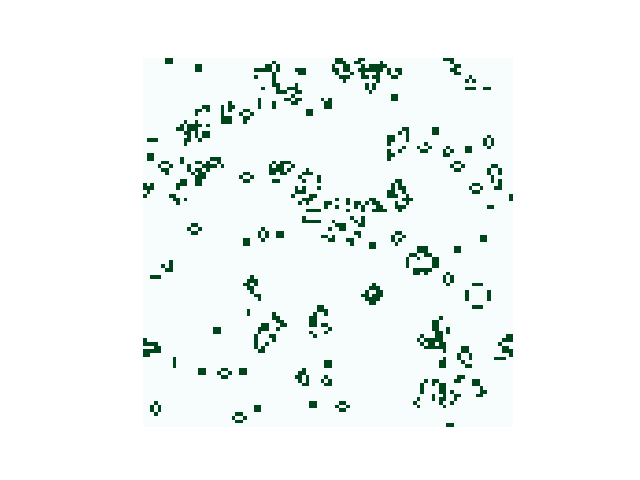

In [4]:
#MAKE SURE to use this backend! The inline backend does not work!!
%matplotlib nbagg 
import matplotlib.animation as animation

#intialize a plot object to show the grids as images
fig = plt.figure()
plt.axis('off')
shots = []

#Loop over the number of generations (i) and play the game
for i in range(1000):
    # Make a list of image snapshots of the grid at each generation
    shots.append((plt.imshow(grid, cmap='BuGn'),))
    conway()
    
# Create an animation using the matplolib animation 
movie = animation.ArtistAnimation(fig, shots, interval=100, repeat_delay=1000, blit=True)


# Save your new movie as a mp4 file
name = 'Conway.mp4'
movie.save(name, writer=animation.FFMpegWriter())
